# July

※ I'll conentrate on solving problems using DP for upcomming two days. <br><br>

The topic I'm planning to focus on the next time : Binary Tree / Greedy

## 22th

### (E) 1646. Get Maximum in Generated Array

only care about speed -  95 / 40

In [ ]:
class Solution(object):
    def getMaximumGenerated(self, n):
        """
        :type n: int
        :rtype: int
        """
        nums = [i for i in range(n + 1)]

        for i in range(2, n + 1):
          if (i % 2) == 0:
            nums[i] = nums[i//2]
          else:
            nums[i] = nums[(i-1)//2] + nums[ ((i-1)//2) + 1]
        
        return max(nums)

similar method with my code above (also similar score)

In [ ]:
class Solution(object):
	def getMaximumGenerated(self, n) :
		if n==0: return 0
		arr = [0, 1]
		for i in range(2, n+1):
			if i%2==0:
				arr.append(arr[i//2])
			else:
				arr.append(arr[i//2] + arr[i//2 + 1])
		return max(arr)

memory efficient way - 31 / 63

In [ ]:
class Solution(object):
    def getMaximumGenerated(self, n):
        """
        :type n: int
        :rtype: int
        """
        nums = [i for i in range(n + 1)]
        maximum = 0 if n == 0 else 1

        for i in range(2, n + 1):
          if (i % 2) == 0:
            nums[i] = nums[i//2]
          else:
            nums[i] = nums[(i-1)//2] + nums[ ((i-1)//2) + 1]

          maximum = max(maximum, nums[i]) # can be replaced with ternary operator
        
        return maximum

print(Solution().getMaximumGenerated(7))

3


Ternary operator made both runtime and memory usage better (still slower than my fastest version tho)- 51 / 84

In [ ]:
class Solution(object):
    def getMaximumGenerated(self, n):
        """
        :type n: int
        :rtype: int
        """
        nums = [i for i in range(n + 1)]
        maximum = 0 if n == 0 else 1

        for i in range(2, n + 1):
          if (i % 2) == 0:
            nums[i] = nums[i//2]
          else:
            nums[i] = nums[(i-1)//2] + nums[ ((i-1)//2) + 1]

          maximum = maximum if maximum > nums[i] else nums[i]
        
        return maximum

print(Solution().getMaximumGenerated(7))

My best version using 1) **append for the speed** and 2) **ternary operator** and **computing maximum among only two numbers each loop for the memory usage** - 89 / 97

In [ ]:
class Solution(object):
    def getMaximumGenerated(self, n):
        """
        :type n: int
        :rtype: int
        """
        nums = [0, 1]
        maximum = 0 if n == 0 else 1

        for i in range(2, n + 1):
          if (i % 2) == 0:
            nums.append(nums[i//2])
          else:
            nums.append(nums[(i-1)//2] + nums[ ((i-1)//2) + 1])

          maximum = maximum if maximum > nums[i] else nums[i]
        
        return maximum

print(Solution().getMaximumGenerated(7))

### (M) 92. Reverse Linked List II ★

For the test<br>
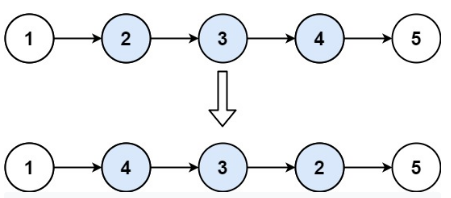

In [ ]:
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)

Key idea : Applying reversing linked list code, while reversing should be done partially and also new head and tail are stored.

In [ ]:

tail = None
cursor = head
prehead = None

while cursor != None: # can do this partially through changing the condition
  newhead = cursor
  cursor = cursor.next
  newhead.next = prehead
  prehead = newhead

  if tail == None: # store the first node within a reversing process as a tail
    tail = newhead


Original version - main case (suppose that 'left >= 2' in most cases) and minor case(handling exceptions ('left == 1') using if-else statement.)

> The code became too long. We should shorten the code for the readability.

17 / 59

In [ ]:
left = 2
right = 4

class Solution(object):
    def reverseBetween(self, head, left, right):
        dummy = head
        cursor = head

        idx = 0
        while True:
          if (idx + 1) == left - 1:
            tail = None
            cursor_ = cursor.next
            cursor.next = None # unlink before reversting starts

            prehead = None

            for i in range(right - left + 1):
              newhead = cursor_
              cursor_ = cursor_.next
              newhead.next = prehead
              prehead = newhead

              if tail == None: # store the first node within a reversing process as a tail
                tail = newhead

            cursor.next = newhead
            tail.next = cursor_

            break
          else:
            if (left == 1):
              tail = None
              prehead = None

              for i in range(right - left + 1):
                newhead = cursor
                cursor = cursor.next
                newhead.next = prehead
                prehead = newhead

                if tail == None: # store the first node within a reversing process as a tail
                  tail = newhead

              tail.next = cursor
              
              return newhead
            else:
              cursor = cursor.next
              idx += 1
          
        return dummy
print(Solution().reverseBetween(head, left, right))

[※ Leetcode provides solutions for free ※](https://leetcode.com/problems/reverse-linked-list-ii/solution/)

Approach 1: Recursion

The idea for linked list reversal using recursion springs from a similar idea that we use for reversing an array. If we want to reverse an array, the huge advantage that we have is the availability of indexes. So, what we can do there is to simply have two pointers.

> &lt;Shortened Pseudocode&gt;<br><br>
1. m, n (same as left and right in description) are given. left, right are each designated to m, n.<br>
2. When left and right reach each one's position (= ending condition of going deeper is met), start swaping and backtracking (decrementing the index of right and incrementing the index of left at the same time)
※ Imagine that there's a function <br>
```python
def a(var):
  work1 (containing the end condition for going deeper)
  a(var')
  work2 (containing works that will be done after starting backtracking)
```
3. Terminate the function when the ending condition of backtracking is met.

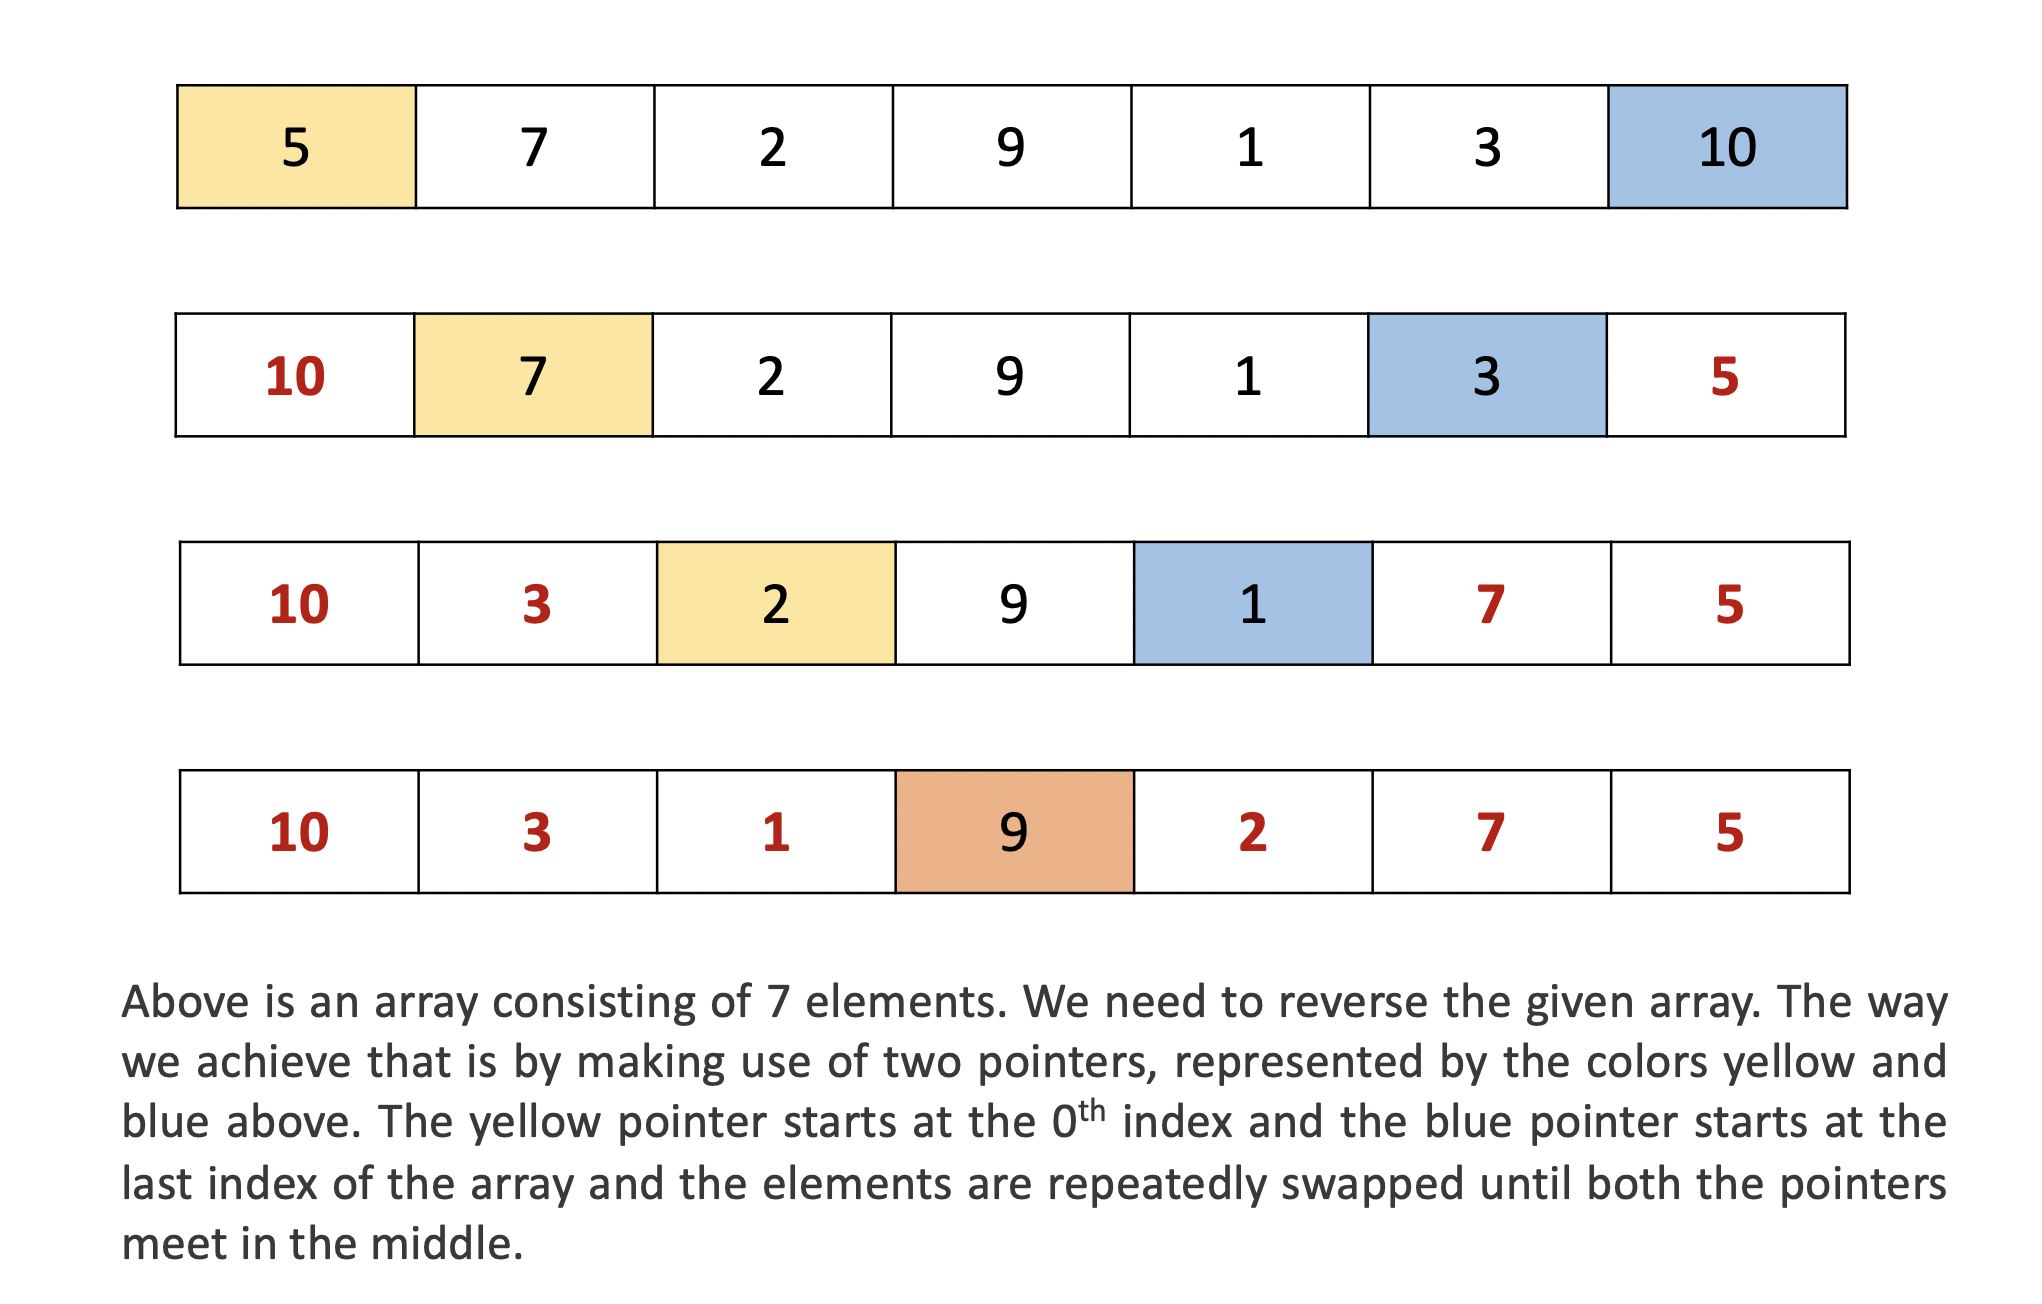

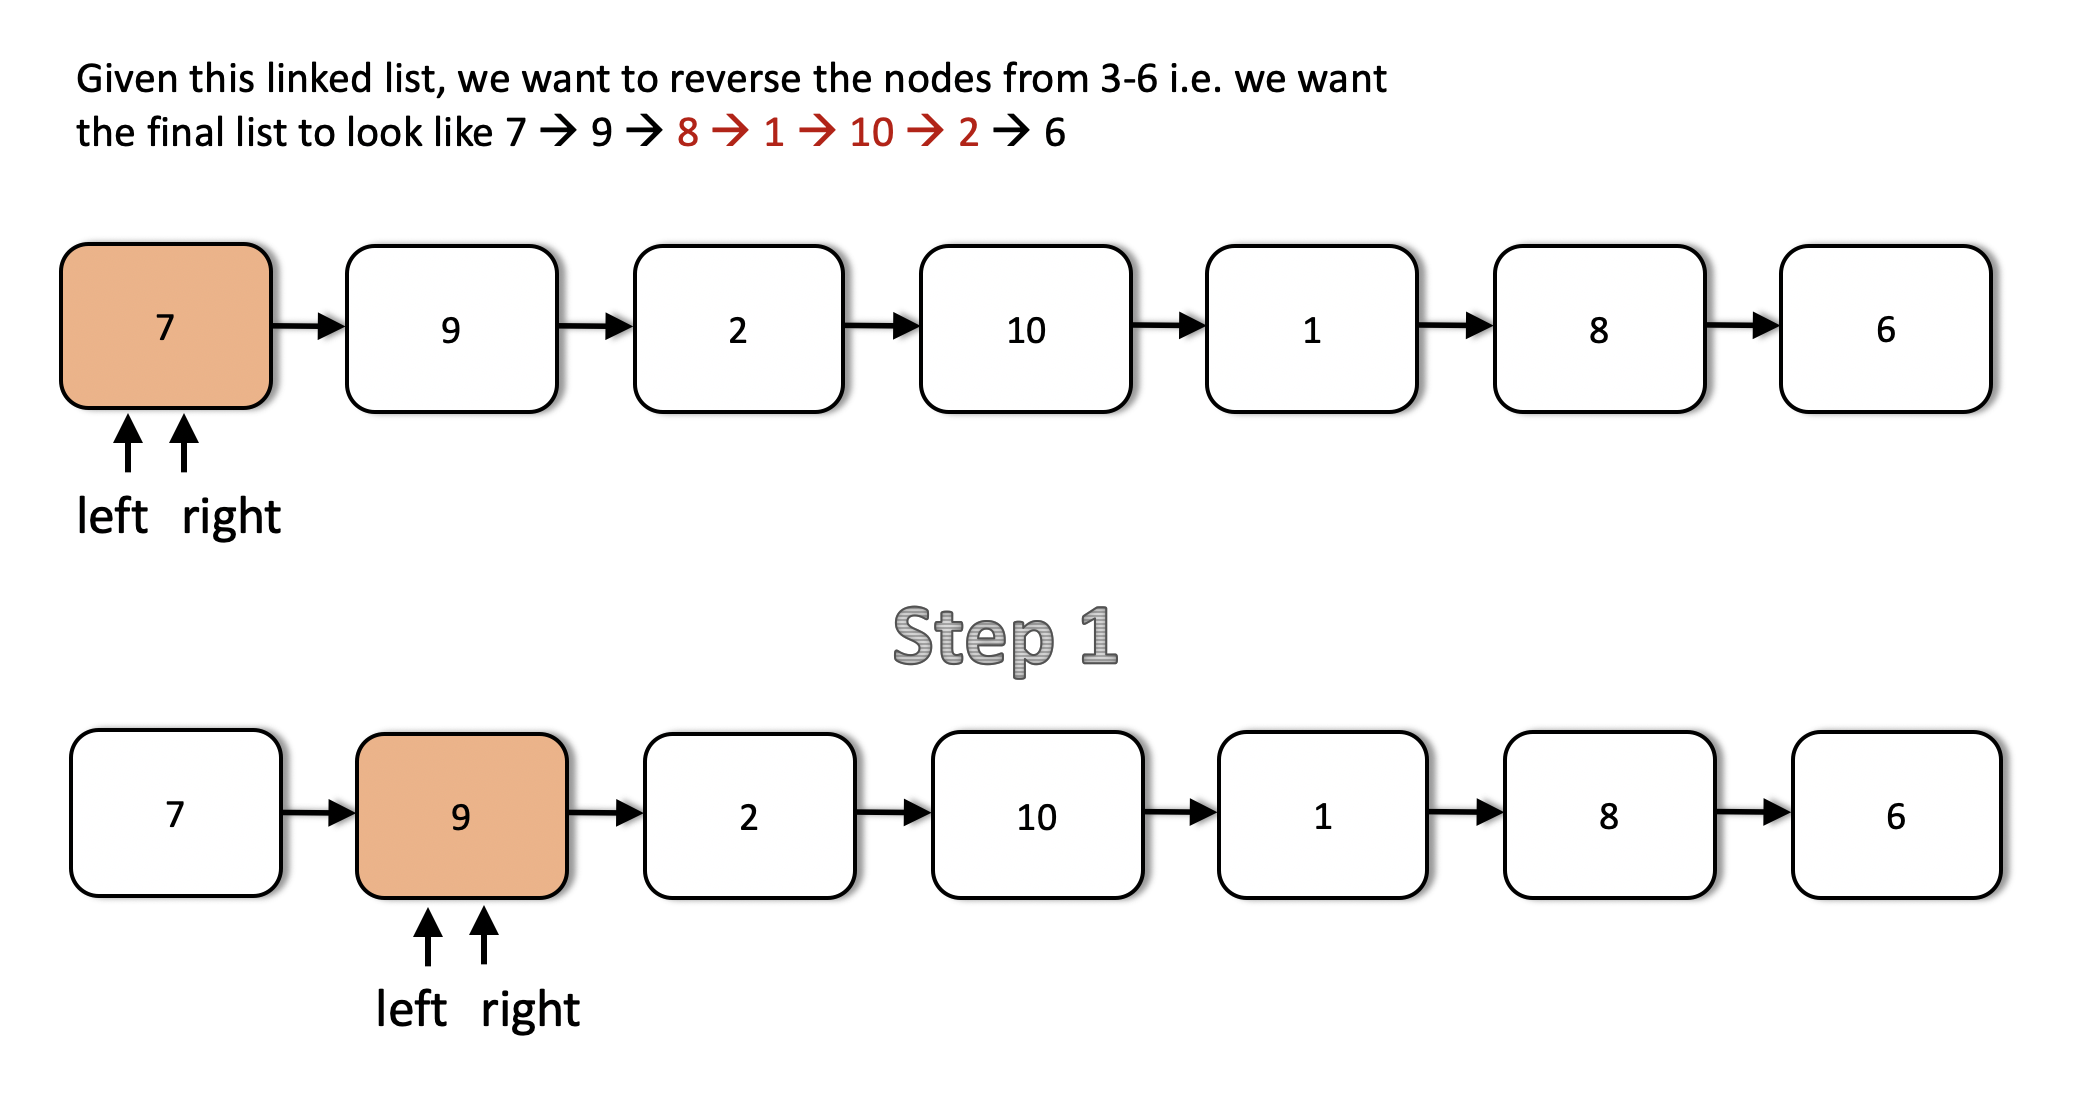

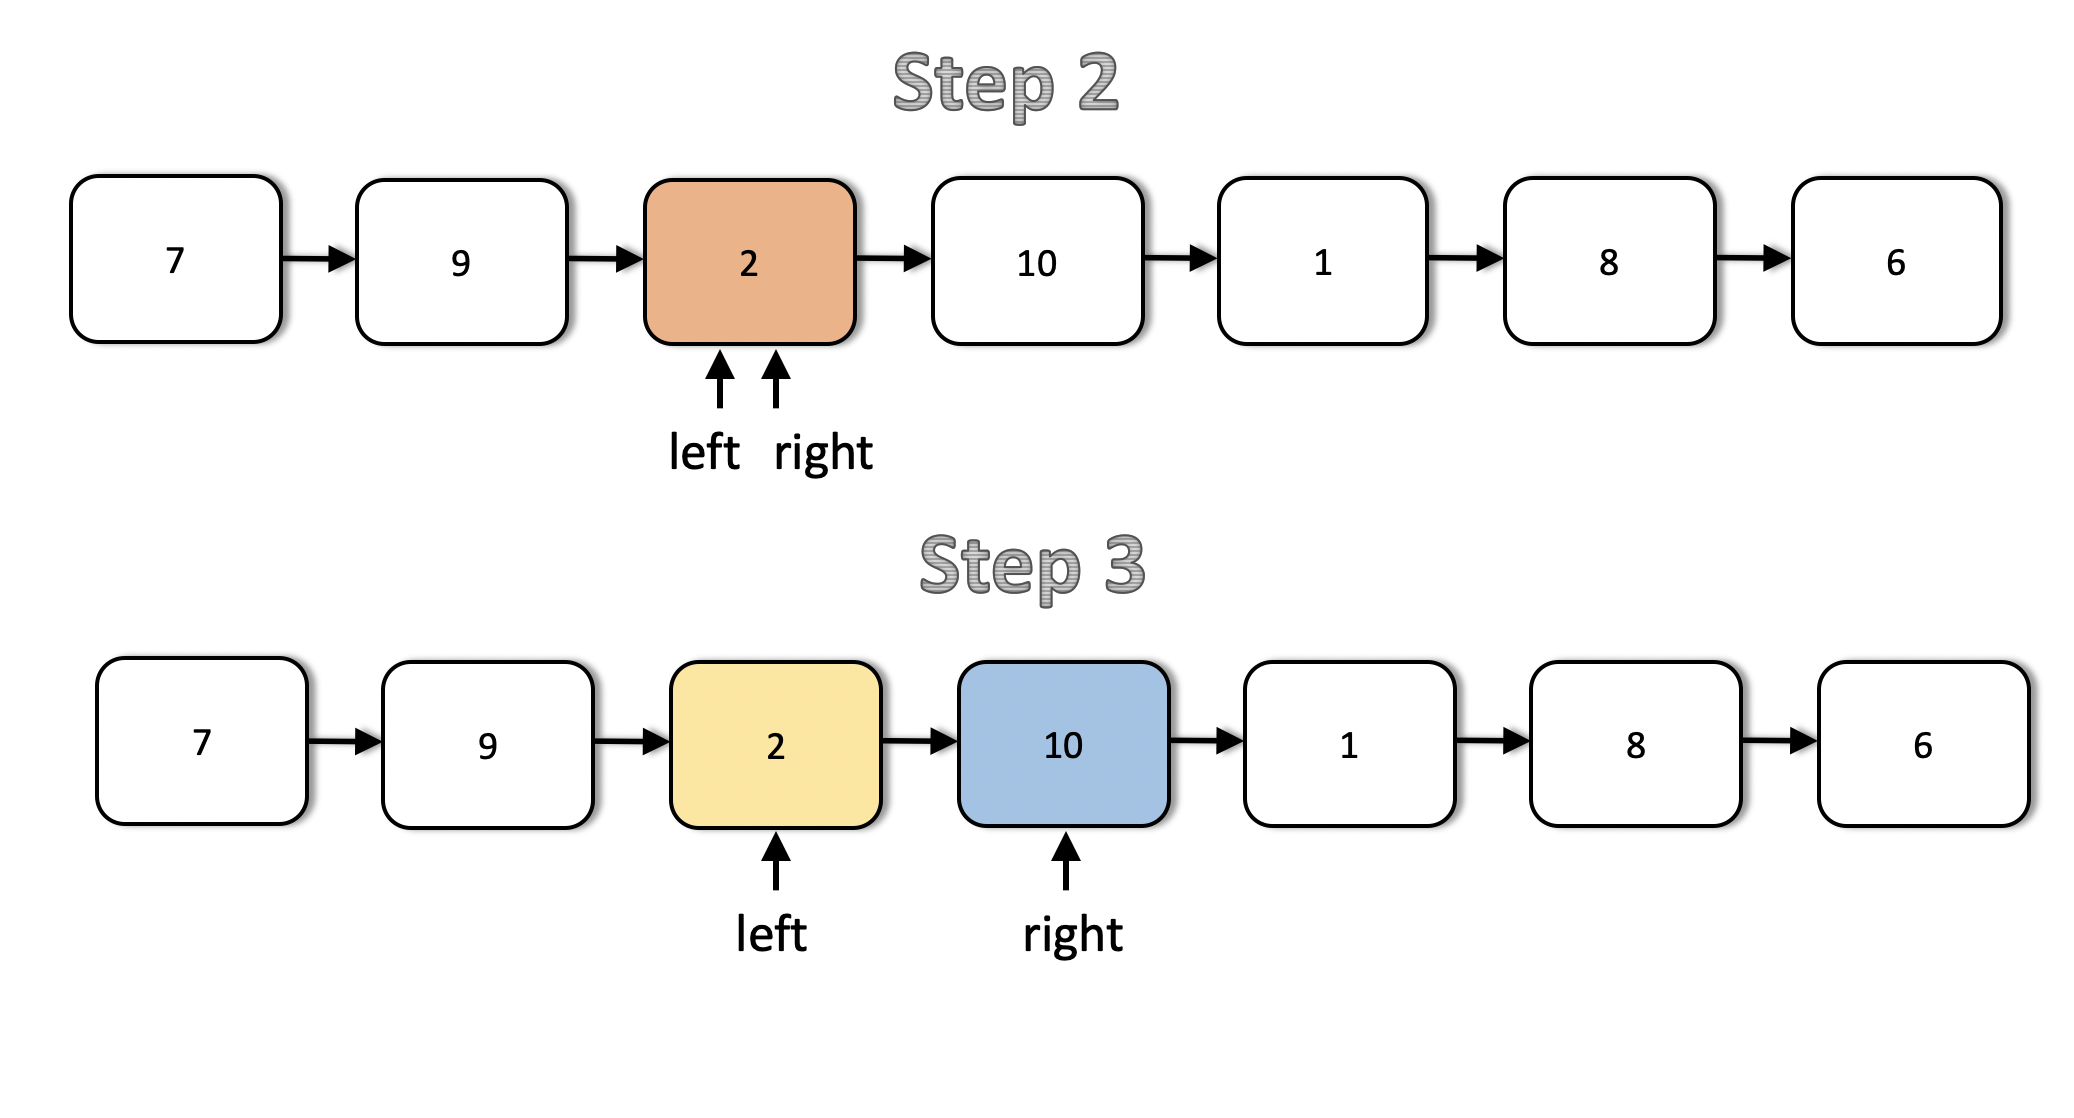

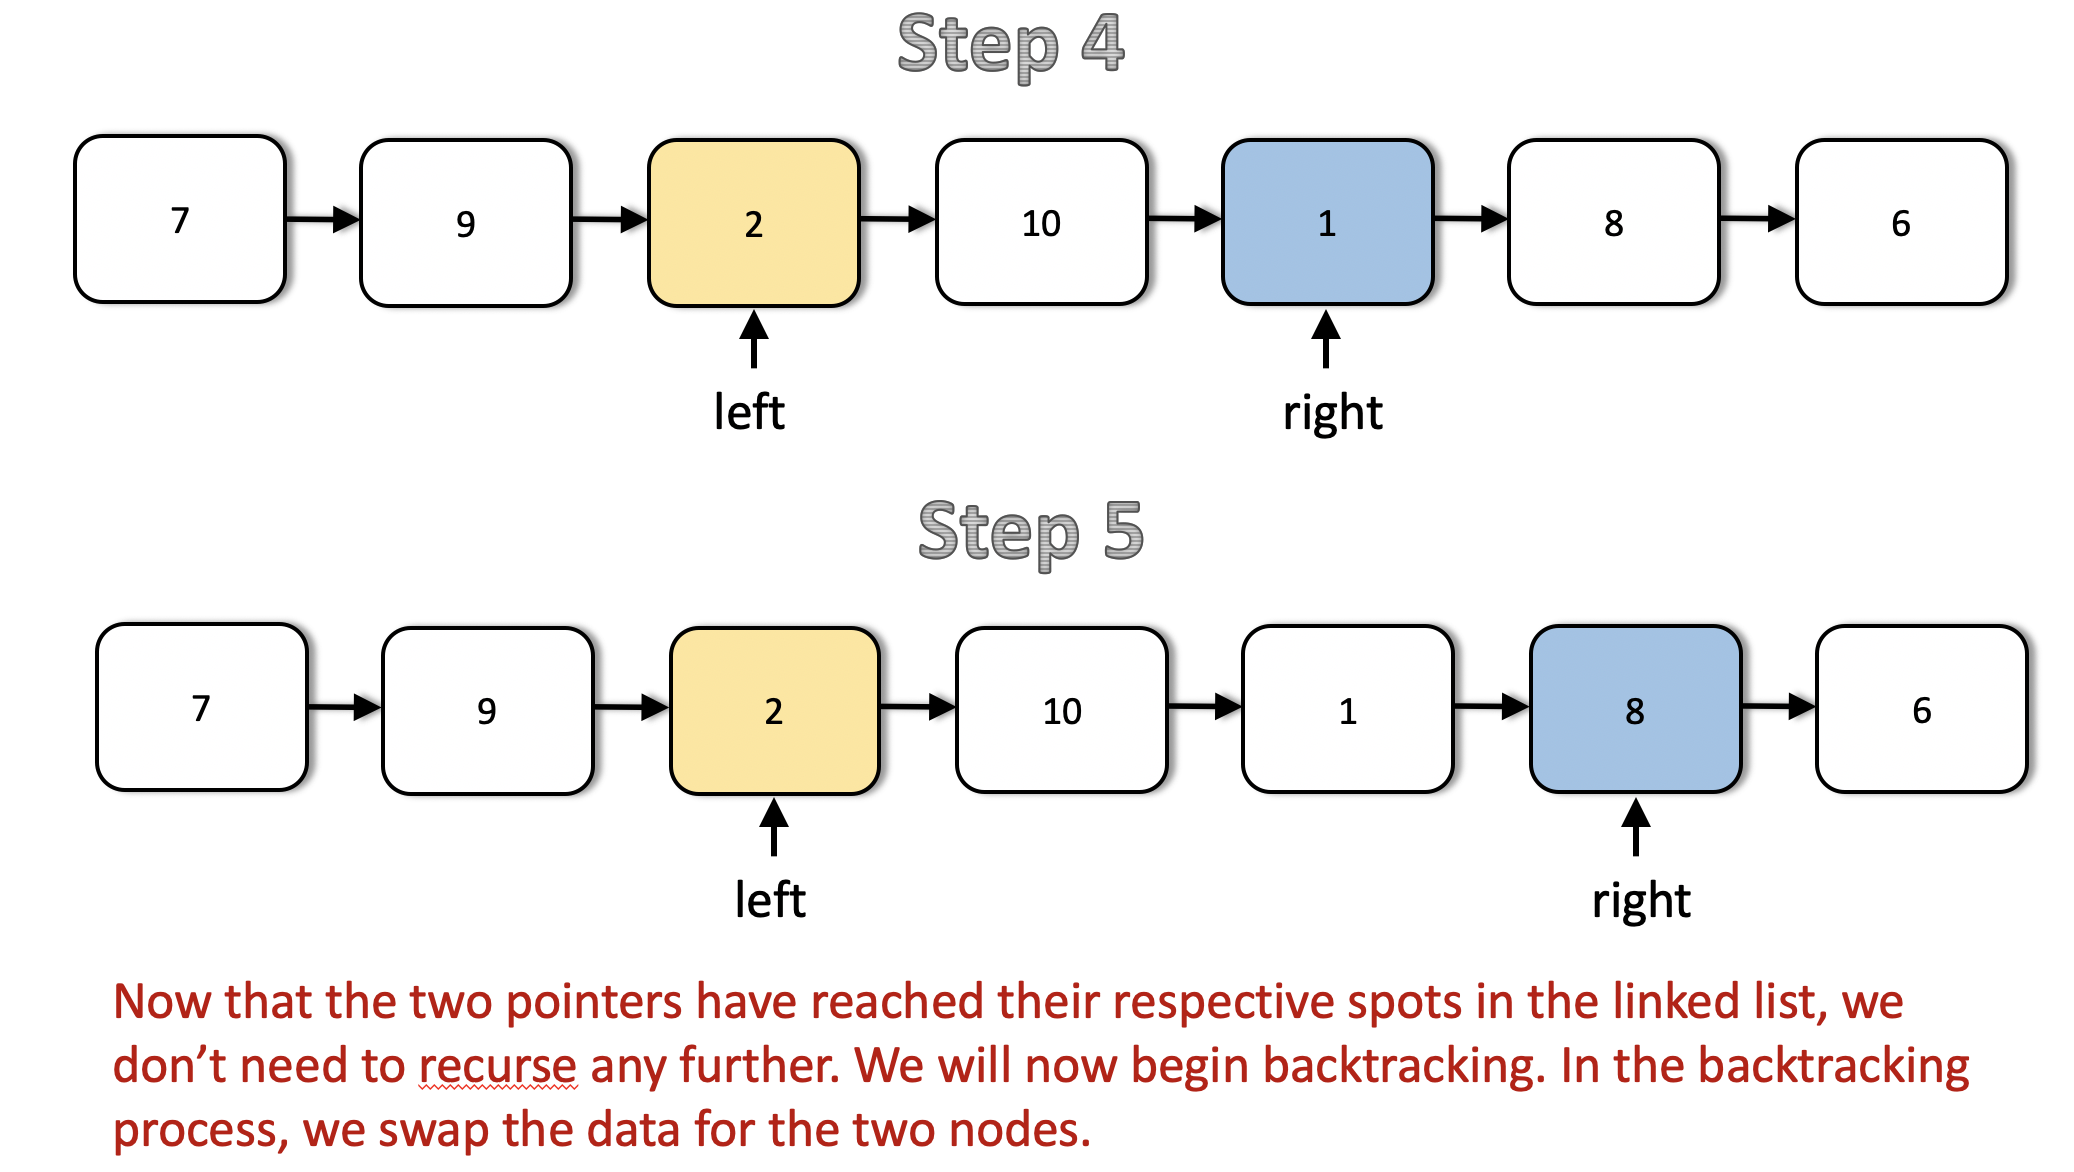

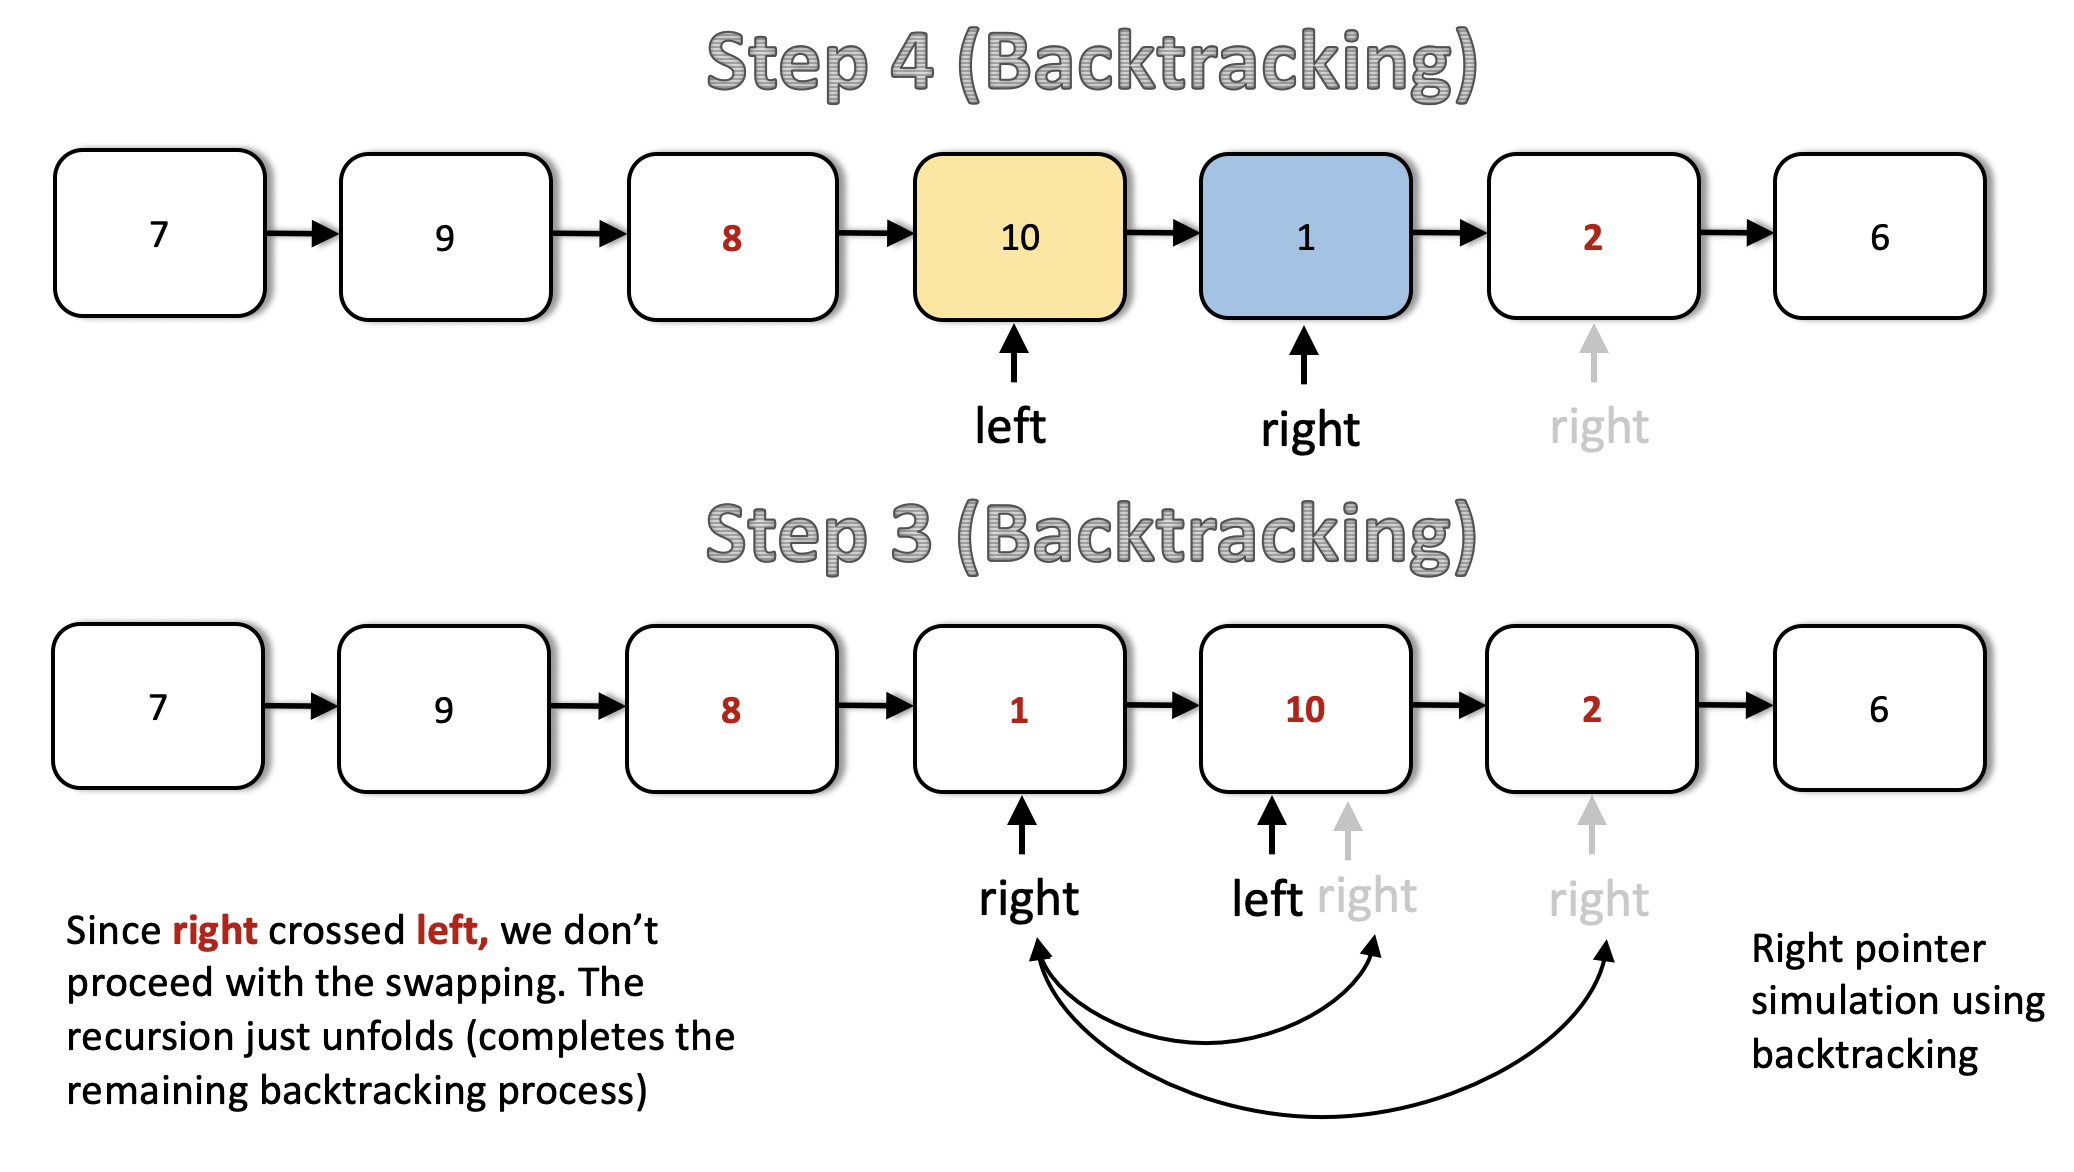

Time complexity : O(n)<br>
Space complexity : O(n)

In [ ]:
class Solution:
    def reverseBetween(self, head, m, n):
        """
        :type head: ListNode
        :type m: int
        :type n: int
        :rtype: ListNode
        """

        if not head:
            return None

        left, right = head, head
        stop = False
        def recurseAndReverse(right, m, n): # m / n : starting / ending point of the reversal
            nonlocal left, stop

            # base case. Don't proceed any further
            if n == 1:
                return

            # Keep moving the right pointer one step forward until (n == 1)
            right = right.next

            # Keep moving left pointer to the right until we reach the proper node
            # from where the reversal is to start.
            if m > 1:
                left = left.next

            # Recurse with m and n reduced.
            recurseAndReverse(right, m - 1, n - 1)

            ############## Backtracking (placed after recursion calling line) ################

            # In case both the pointers cross each other or become equal, we
            # stop i.e. don't swap data any further. We are done reversing at this
            # point.
            if left == right or right.next == left:
                stop = True

            # Until the boolean stop is false, swap data between the two pointers     
            if not stop:
                left.val, right.val = right.val, left.val

                # Move left one step to the right.
                # The right pointer moves one step back via backtracking.
                left = left.next           

        recurseAndReverse(right, m, n)
        return head

Approach 2: Iterative (Better)

Do these iteratively;<br><br> 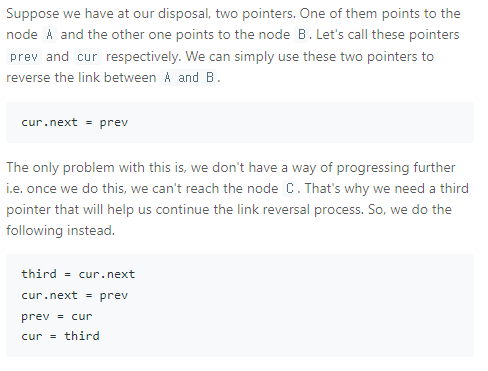

Same algorithm as mine but this is much cleaner<br><br>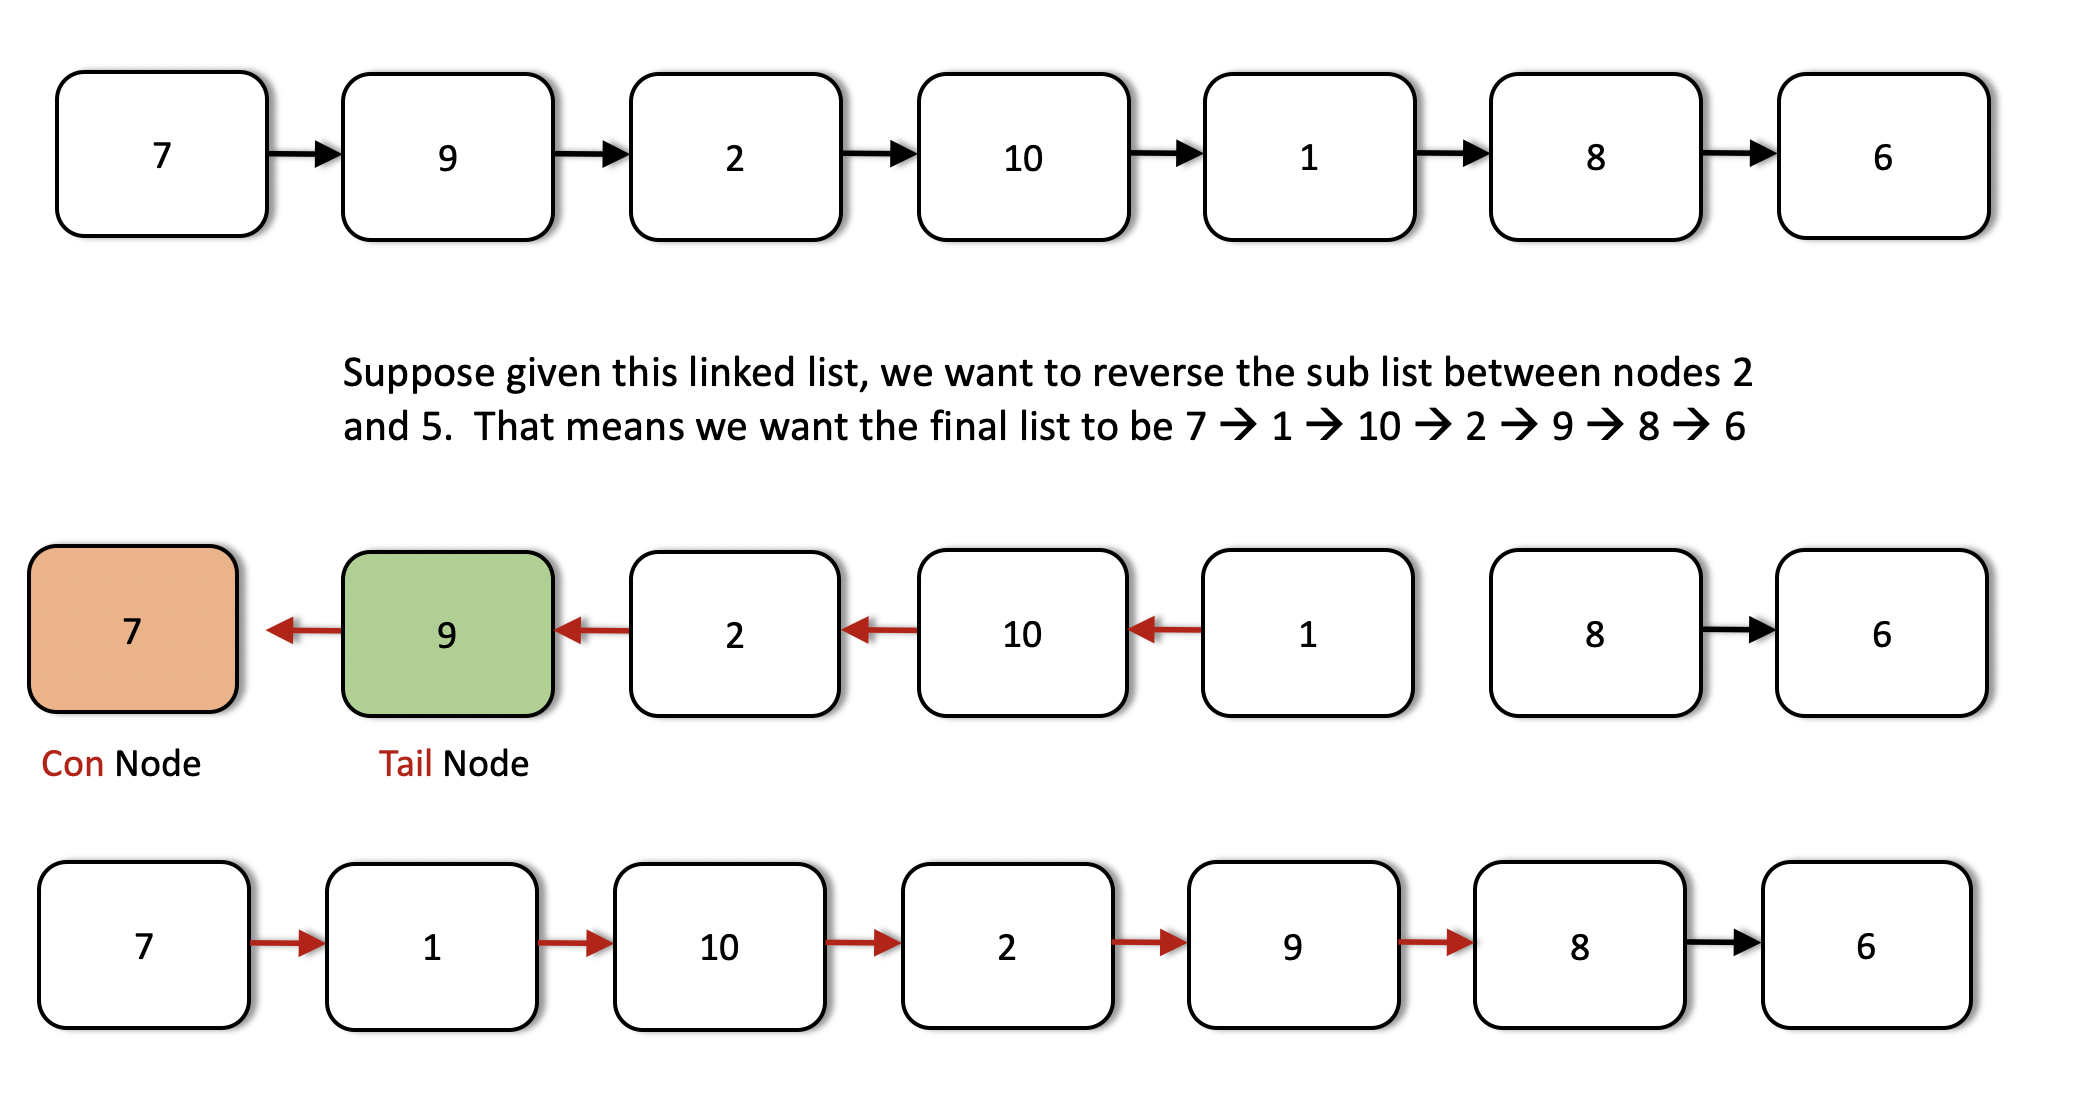

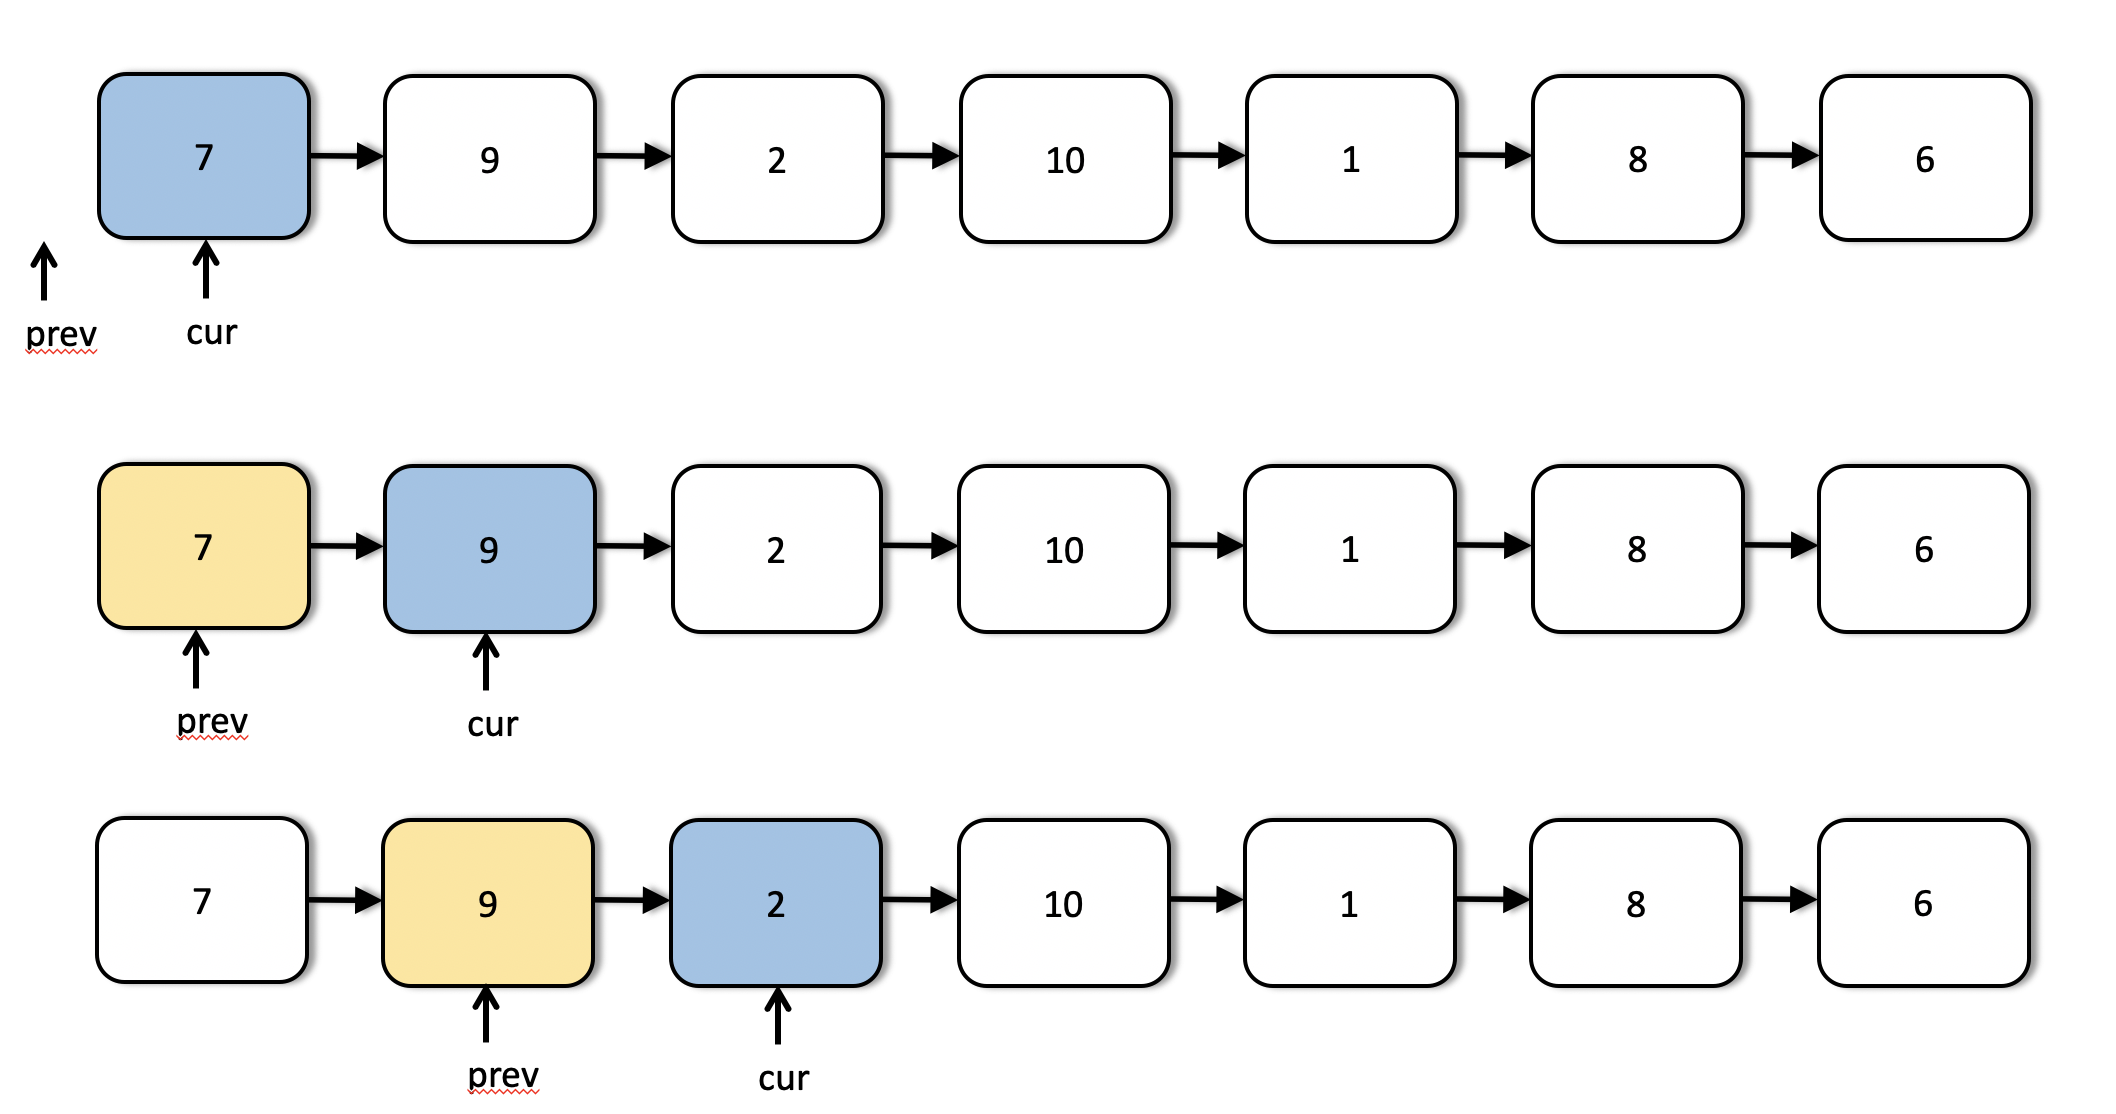

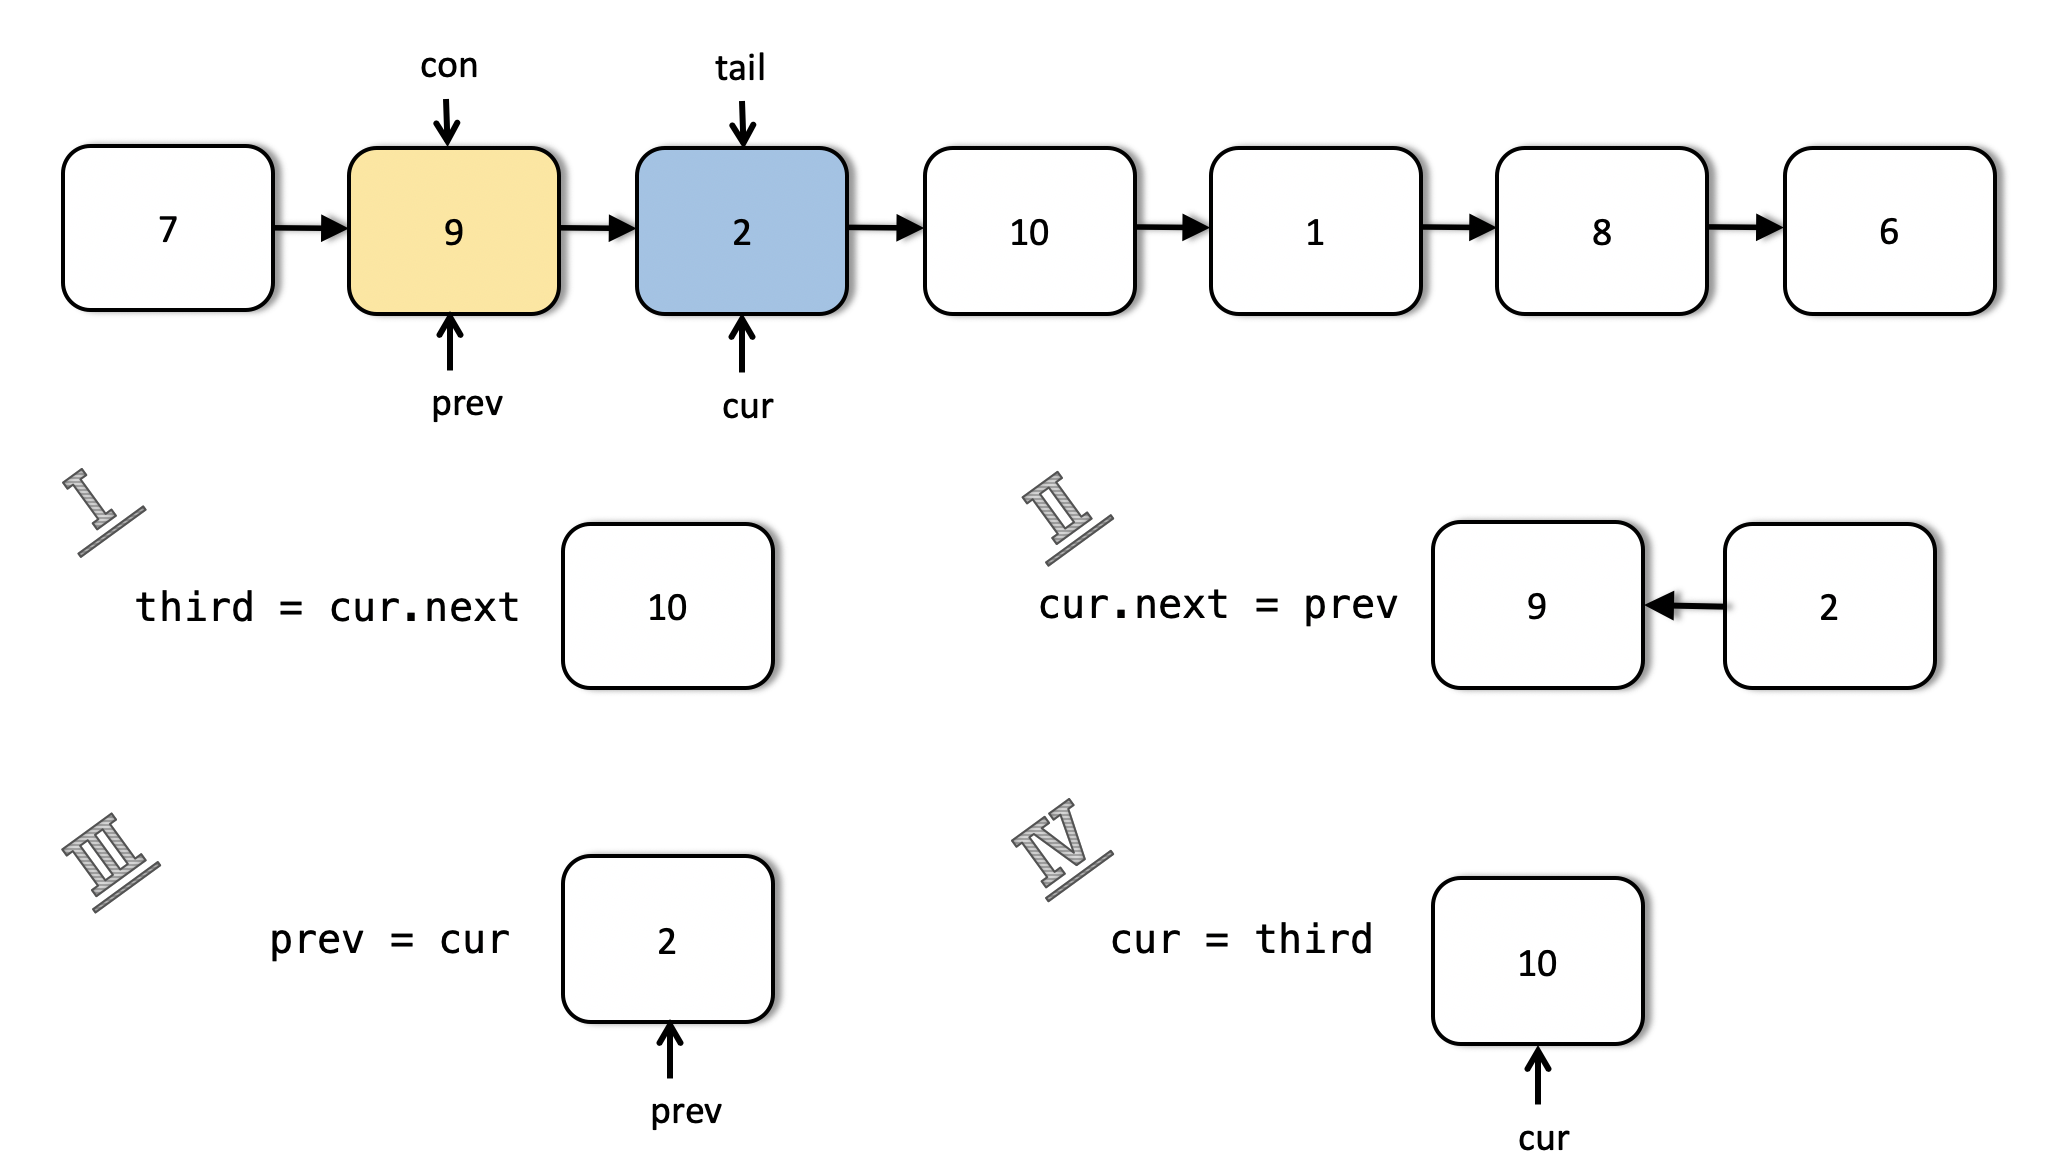

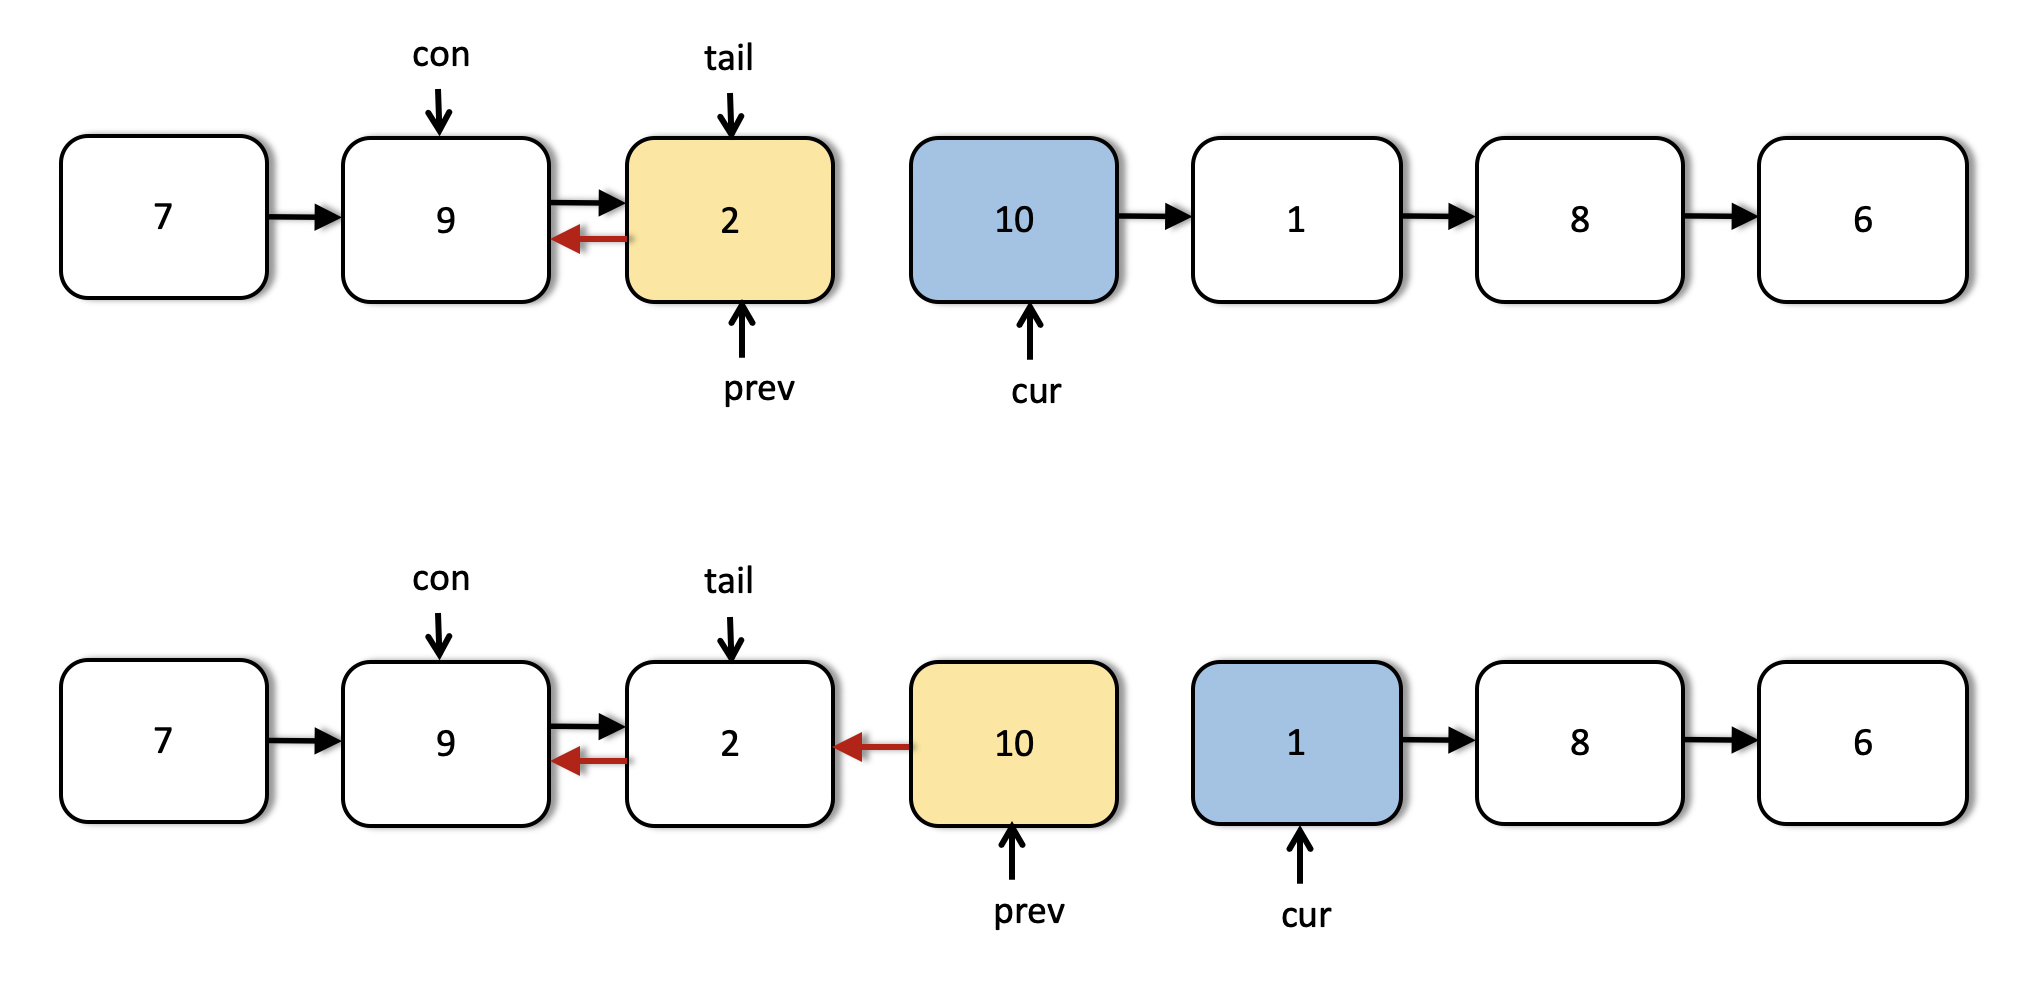

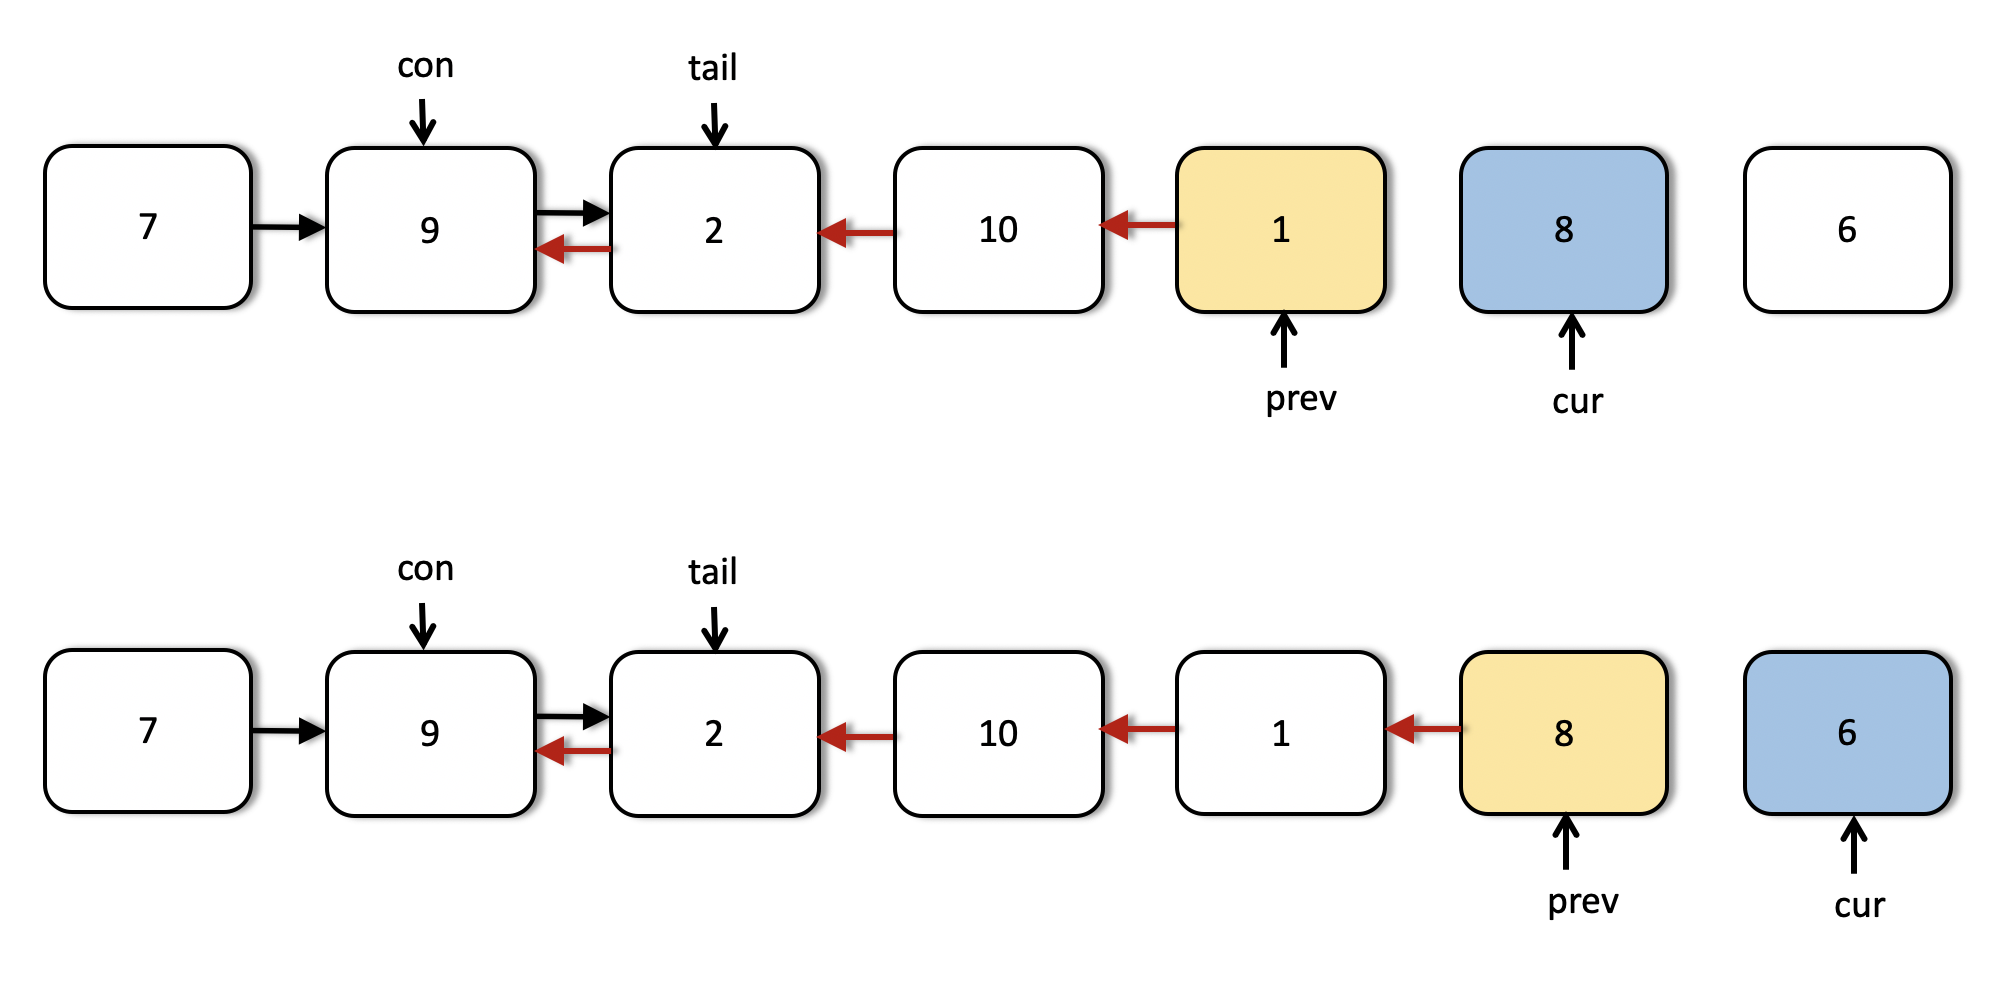

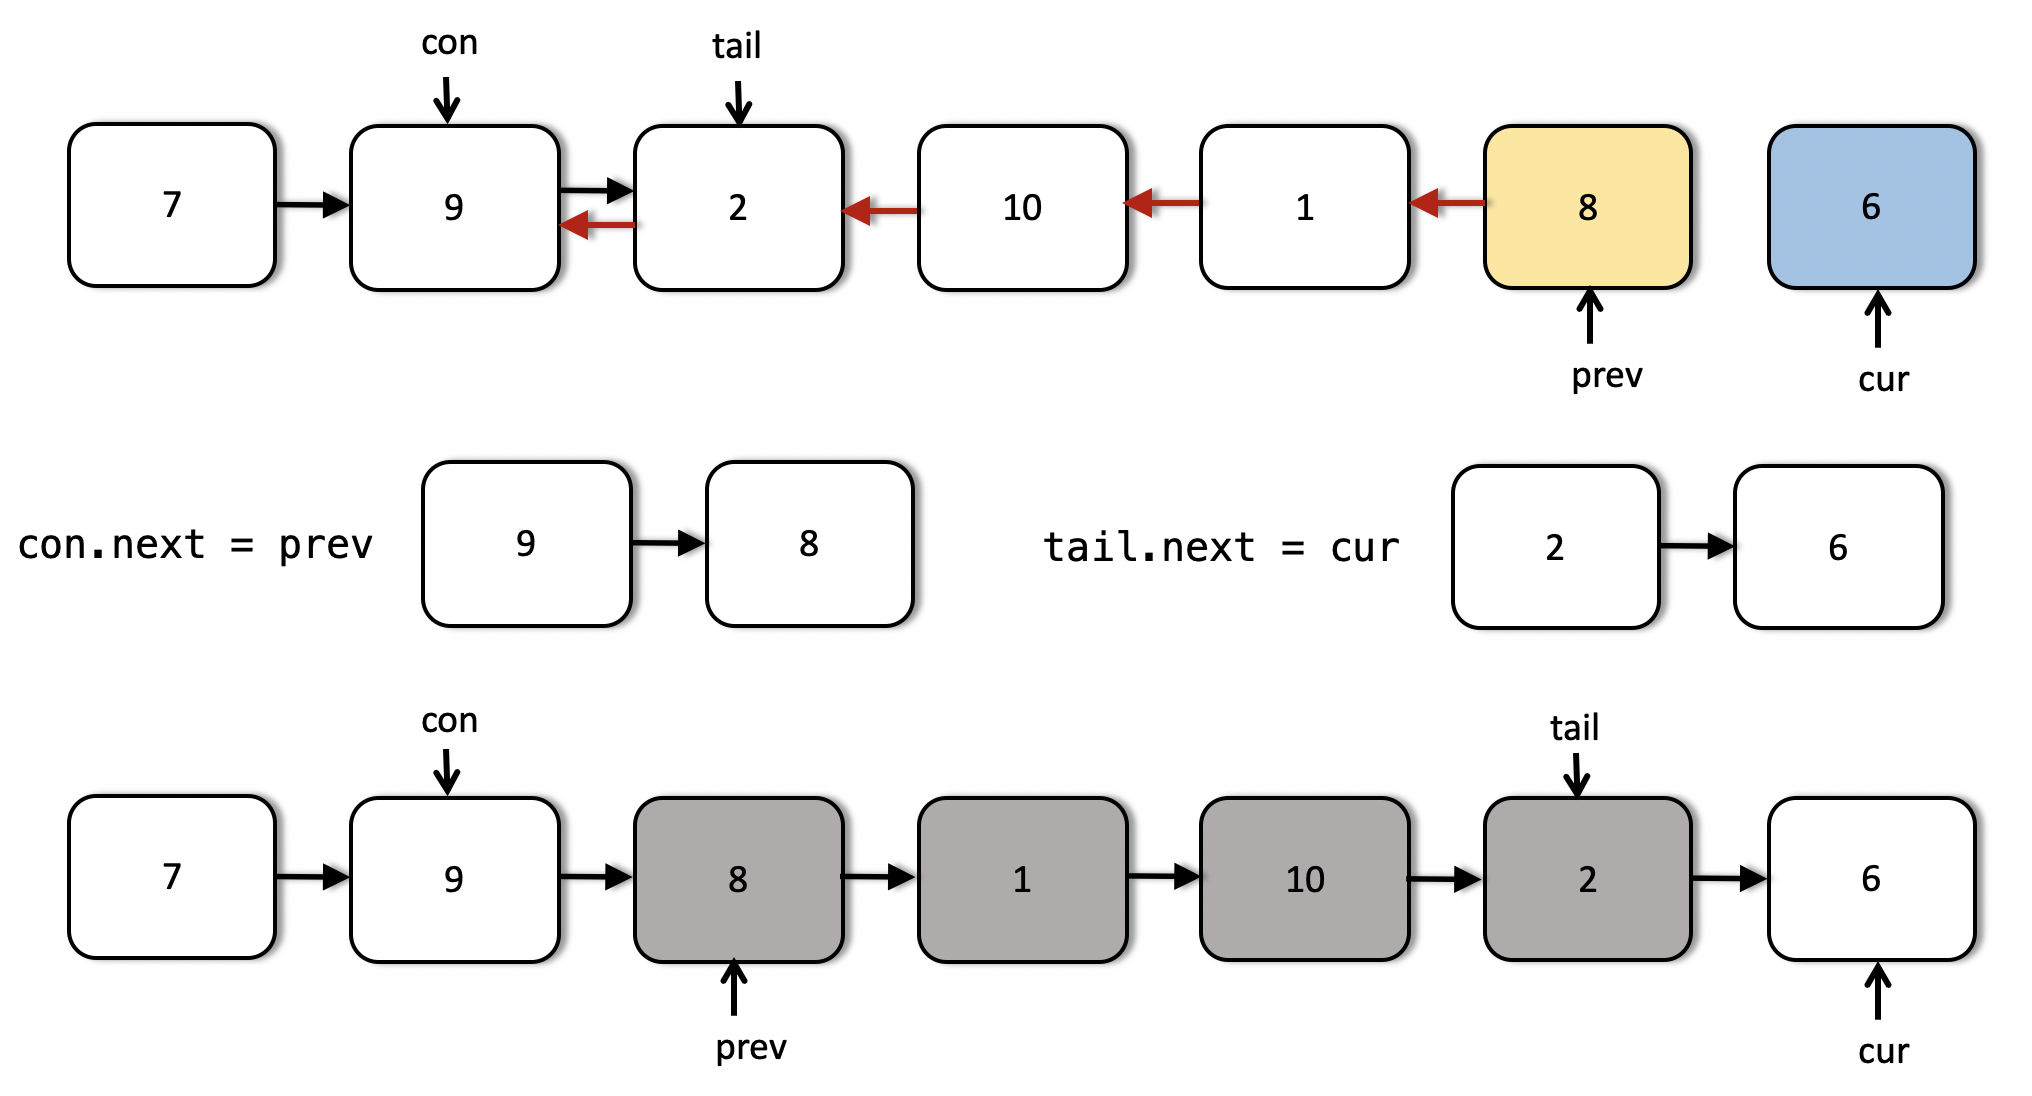

Time complexity : O(n)<br>
Space complexity : O(1)

In [ ]:
class Solution:
    def reverseBetween(self, head, m, n):
        """
        :type head: ListNode
        :type m: int
        :type n: int
        :rtype: ListNode
        """

        # Empty list
        if not head:
            return None

        # Move the two pointers until they reach the proper starting point
        # in the list.
        cur, prev = head, None
        while m > 1:
            prev = cur
            cur = cur.next
            m, n = m - 1, n - 1

        # The two pointers that will fix the final connections.
        tail, con = cur, prev

        # Iteratively reverse the nodes until n becomes 0.
        while n:
            third = cur.next
            cur.next = prev
            prev = cur
            cur = third
            n -= 1

        # Adjust the final connections as explained in the algorithm
        if con:
            con.next = prev
        else:
            head = prev
            
        tail.next = cur
        return head

### (M) 1641. Count Sorted Vowel Strings ★

Similar to **(M) No. 77(DFS . Iterative, ...)** and **(M) No. 62 (DP)**

Using DFS (poor score) - 5 / 5

In [ ]:
n = 33

class Solution(object):
    def countVowelStrings(self, n):
        self.arr = ["a","e","i","o","u"]
    
        ret = []
        self.dfs(n, 4, '', ret) # n, maximum, string, ret
        return len(ret)
    
    def dfs(self, n, maximum, string, ret):
        if n == 0:
            ret.append(string)
            return 
        for i in range(maximum + 1):
            self.dfs(n-1, i, string + self.arr[i], ret)

print(Solution().countVowelStrings(n))

66045


Leetcode Solution (DP / 100%)

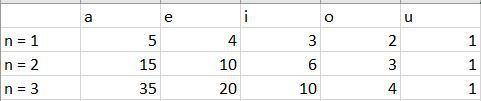



> For n = 1, number of strings starting with u is 1, with o is 2 (including the ones starting with u) and so on.<br>
For n = 2, number of strings starting with u is 1, but for o its (number of strings of length 2 starting with u + number of strings of length 1 starting with o) and so on.<br><br>
dp[i][j] represents total no. of string of length i , starting with characters of column j and after j.
<br><br>
The recursive expression is : dp[i][j] = dp[i - 1][j] + dp[i][j + 1]
<br><br>
Finally, we will get our answer at dp[n][0]
<br><br>
The running time of my algorithm is O(n)






In [ ]:
class Solution(Object):
    def countVowelStrings(self, n):
        dp = [[i for i in range(5,0,-1)] for _ in range(n)]   # intialize dp matrix
        
        for i in range(1,n):
            for j in range(3,-1,-1):
                dp[i][j] = dp[i - 1][j] + dp[i][j + 1]   # dp expression
                
        return dp[n-1][0]

In [ ]:
for i in range(3, -1, -1):
  print(i)

3
2
1
0


## 23th

### (E) 121. Best Time to Buy and Sell Stock

My approach : using [Kadane's algorithm](https://medium.com/@rsinghal757/kadanes-algorithm-dynamic-programming-how-and-why-does-it-work-3fd8849ed73d) / idea spings from (M) 53. Maximum Subarray

48 / 5

In [ ]:
prices = [7,1,5,3,6,4]

class Solution(object):
    def maxProfit(self, prices):
        """
        :type prices: List[int]
        :rtype: int
        """
        if len(prices) == 1:
          return 0
        

        ## Kadane algorithm ##
        prices = [ prices[i] - prices[i - 1]for i in range(1, len(prices))]

        for i in range(1,len(prices)):
          prices[i] = max(prices[i], prices[i-1] + prices[i])

        return(max(prices)) if (max(prices)) > 0 else 0

        ##                  ##

print(Solution().maxProfit(prices))

5


leetcode solution(memory efficient) - 24 / 75

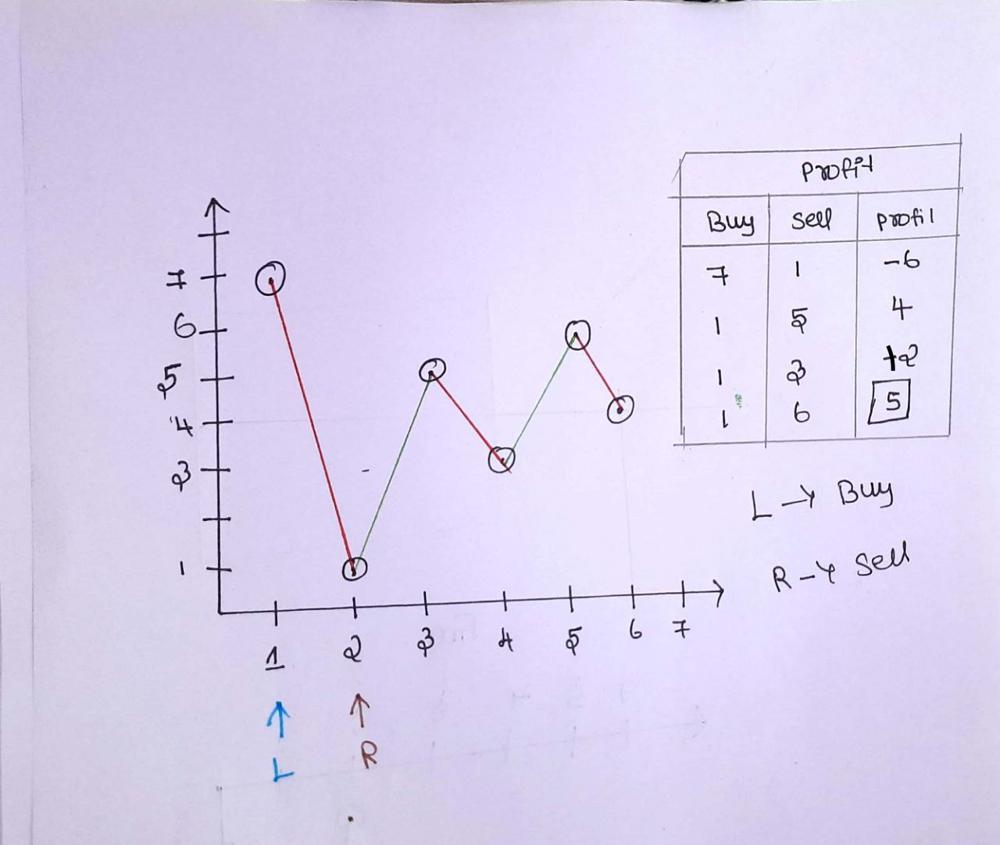

※ a, b, c, ... > 4 <br>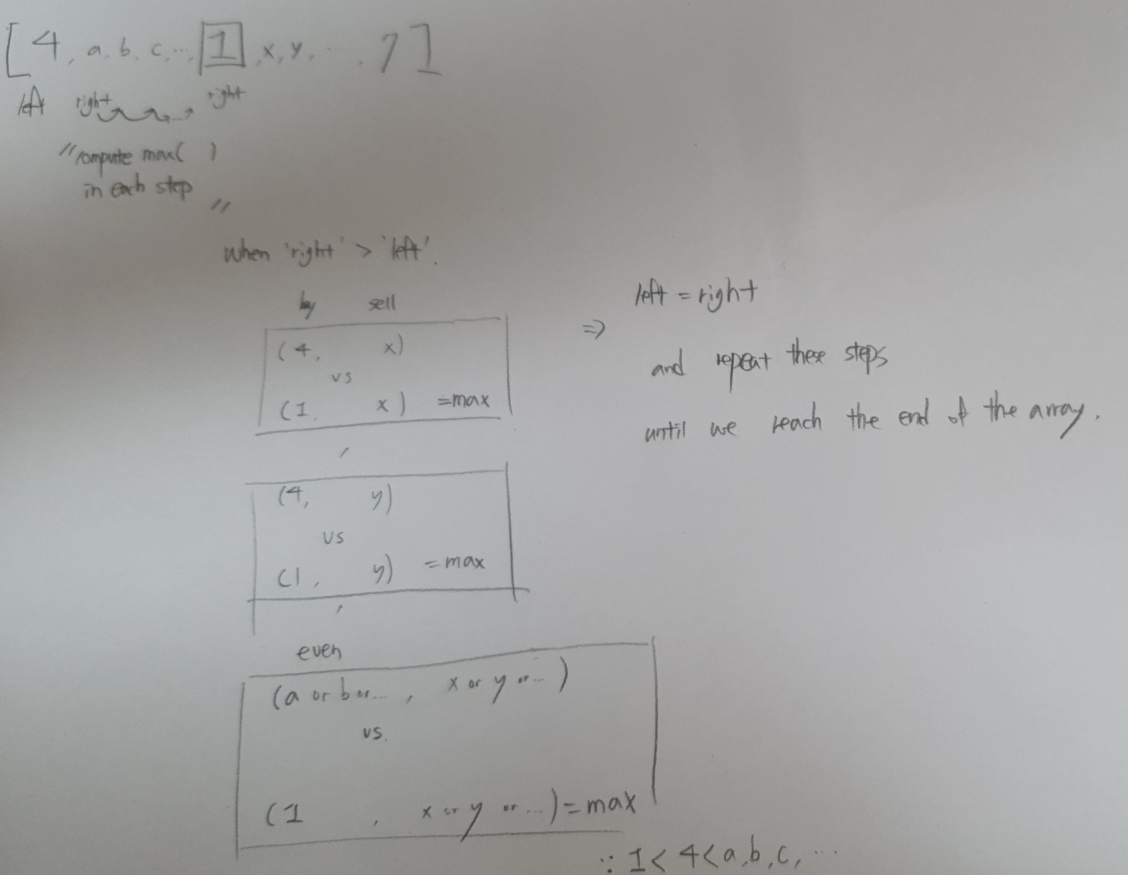

In [ ]:
class Solution:
    def maxProfit(self,prices):
        left = 0 #Buy
        right = 1 #Sell
        max_profit = 0
        while right < len(prices):
            currentProfit = prices[right] - prices[left] #our current Profit
            if prices[left] < prices[right]: # KEY POINT
                max_profit = max(currentProfit,max_profit)
            else:
                left = right
            right += 1
        return max_profit

### (M) 59. Spiral Matrix II ★★



Simply walk the spiral - 26 / 36

In [3]:
def generateMatrix(self, n):
    A = [[0] * n for _ in range(n)]

    i, j, di, dj = 0, 0, 0, 1
    for k in range(n*n):
        
        A[i][j] = k + 1
        if A[(i+di)%n][(j+dj)%n]: # if the element is not zero -> if we reach any explored cell
            di, dj = dj, -di
        i += di
        j += dj
    return A

Best (splendid) leetcode solution

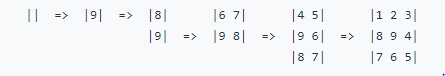

In [2]:
def generateMatrix(self, n):
    A, lo = [], n*n+1
    while lo > 1:
        lo, hi = lo - len(A), lo
        A = [range(lo, hi)] + zip(*A[::-1])
    return A